# Module 1 - Data Load / Display / Normalization

In this module you will learn how to load a dicom image utilizing  pydicom and create datasets that can be used with machine learning algorithms. The basic features we will consider are intensity based and originate from multiple acquisition types. 

if you get an error on this statement, you need to install the library:
pip install pydicom

### Step 1: Load basic python libraries 

In [10]:
%matplotlib inline
import os 
import dicom as pydicom # library to load dicom images 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import csv
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
import nibabel as nib

### Step 2: Load the three type of image availble. 

- T1w pre-contrast
- FLAIR 
- T1w post-contrast 

The goal is to  create a 4D iamge that contains all four 2d slices we will use in our example

In [11]:
CurrentDir= os.getcwd()

# Print current directory
print (CurrentDir)

# Get parent direcotry 
print(os.path.abspath(os.path.join(CurrentDir, os.pardir)))

# Create the file paths. The images are contained in a subfolder called Data. 
PostName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data",  'POST.nii.gz')  )
PreName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'PRE.nii.gz') )
FLAIRName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'FLAIR.nii.gz') )
GT =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'GroundTruth.nii.gz') )


# read Pre in--we assume that all images are same x,y dims
Pre = nib.load(PreName)
# Pre is a class containing the image data among other information 
Pre=Pre.get_data()
xdim = np.shape(Pre)[0]
ydim = np.shape(Pre)[1]
zdim = np.shape(Pre)[2]
# Printing the dimensions of an image 
print ('Dimensions')
print (xdim,ydim,zdim)
# make space in a numpy array for the images
ArrayDicom = np.zeros((xdim, ydim,zdim, 4), dtype=Pre.dtype)
# copy Pre pixels into z=0
ArrayDicom[:, :, :, 0] = Pre
# Post
Post = nib.load(PostName)
# Pre is a class containing the image data among other information 
Post=Post.get_data()
ArrayDicom[:, :, :, 1] = Post
#FLAIR
Flair = nib.load(FLAIRName)
# Pre is a class containing the image data among other information 
Flair=Flair.get_data()
ArrayDicom[:, :, :, 3] = Flair  
print ("Data Loaded")

/Users/m112447/Dropbox/MachineLearningForMedicalImages/notebooks
/Users/m112447/Dropbox/MachineLearningForMedicalImages
Dimensions
(240, 240, 155)
Data Loaded


### Create traing set

We assume the following labels. 

> Enhancing Tumor = 4

> Edema = 2

> WM+CSF=1

> Background (air) = 0
    

In [12]:
#  Load segmentation
GT = nib.load(GT)
GT=GT.get_data()
GT[GT==1]=0
GT[Pre==0]=5
GT[GT==0]=1
GT[GT==5]=0
print ("Data Loaded")

Data Loaded


#### Plot the images 

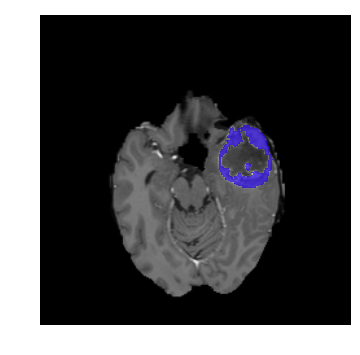

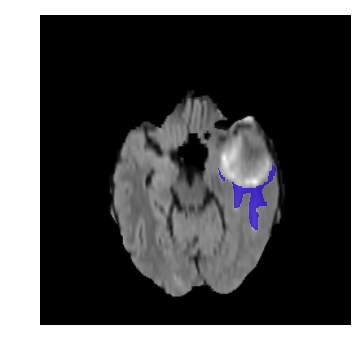

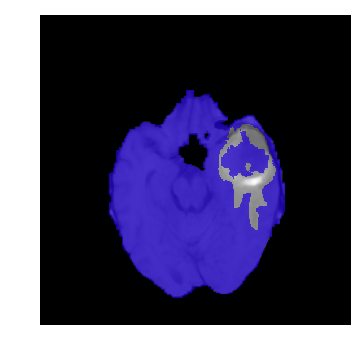

In [13]:
def display_overlay(Image1, Image2):
    """
    Function: Overlays Image2 over Image1
    Image 1: 2D image
    Image 2: 2D Image

    Requires numpy, matplotlib
    """
    Image1=np.rot90(Image1,3)
    Image2=np.rot90(Image2,3)
    Image2 = np.ma.masked_where(Image2 == 0, Image2)
    plt.imshow(Image1, cmap=plt.cm.gray)
    plt.imshow(Image2, cmap=plt.cm.brg, alpha=.7, vmin=.7, vmax=5, interpolation='nearest')
    plt.axis('off')
    plt.show()
    
display_overlay(Post[:, :, 55,], GT[:,:,55]==4)  
display_overlay(Flair[:, :, 55,], GT[:,:,55]==2)  
display_overlay(Pre[:, :, 55,], GT[:,:,55]==1)    

### Create dataset

In [14]:
# Create classes
# Tissue =GM+CSG+WM
ClassTissuePost=(Post[np.nonzero(GT==1)])
ClassTissuePre=(Pre[np.nonzero(GT==1)])
ClassTissueFlair=(Flair[np.nonzero(GT==1)])
# Enhancing Tumor 
ClassTumorPost=(Post[np.nonzero(GT==4)])
ClassTumorPre=(Pre[np.nonzero(GT==4)])
ClassTumorFlair=(Flair[np.nonzero(GT==4)])
# Edema 
ClassEdemaPost=(Post[np.nonzero(GT==2)])
ClassEdemaPre=(Pre[np.nonzero(GT==2)])
ClassEdemaFlair=(Flair[np.nonzero(GT==2)])

# Normalize zero mean unit standard deviation

ClassTissuePost= preprocessing.scale(ClassTissuePost)
ClassTissuePre= preprocessing.scale(ClassTissuePre)
ClassTissueFlair= preprocessing.scale(ClassTissueFlair)
ClassTumorPost= preprocessing.scale(ClassTumorPost)
ClassTumorPre= preprocessing.scale(ClassTumorPre)
ClassTumorFlair= preprocessing.scale(ClassTumorFlair)
ClassEdemaPost= preprocessing.scale(ClassEdemaPost)
ClassEdemaPre= preprocessing.scale(ClassEdemaPre)
ClassEdemaFlair= preprocessing.scale(ClassEdemaFlair)


# Save the data to CSV using pandas
print ("Saving the data to a pandas dataframe and subsequently to a csv")
# Create a dictionary containing the classes
datasetcomplete={"ClassTissuePost": ClassTissuePost, "ClassTissuePre": ClassTissuePre, "ClassTissueFlair": ClassTissueFlair, "ClassTumorPost": ClassTumorPost, "ClassTumorPre": ClassTumorPre, "ClassTumorFlair": ClassTumorFlair, "ClassEdemaPost": ClassEdemaPost, "ClassEdemaPre": ClassEdemaPre, "ClassEdemaFlair": ClassEdemaFlair}

datapd=pd.DataFrame.from_dict(datasetcomplete,orient="index")
# print (datapd)
datapd=datapd.transpose()
# datapd=pd.DataFrame(dict([ (k,Series(v)) for k,v in datasetcomplete.iteritems() ]))
datapd.to_csv("DataExample.csv",index=False)




/Users/m112447/Documents/PythonEnv/skynet/lib/python2.7/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/m112447/Documents/PythonEnv/skynet/lib/python2.7/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Saving the data to a pandas dataframe and subsequently to a csv


### Create some scatter plots

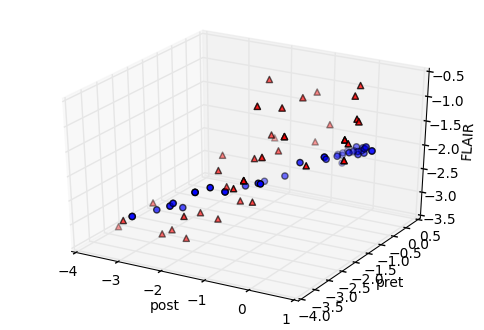

In [15]:
# Display Tumor vs NAWM
IND=np.random.randint(100, size=50)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ClassTissuePost[IND,], ClassTissuePre[IND,], ClassTissueFlair[IND,])
ax.scatter(ClassTumorPost[IND,], ClassTumorPre[IND,], ClassTumorFlair[IND,], c='r', marker='^')
ax.set_xlabel('post')
ax.set_ylabel('pret')
ax.set_zlabel('FLAIR')
plt.show()


## Describe the data 

In [16]:
# descriptions
print(datapd.describe())

       ClassEdemaPre  ClassEdemaPost  ClassTissueFlair  ClassEdemaFlair  \
count   5.305000e+04    5.305000e+04      1.403532e+06     5.305000e+04   
mean   -5.172190e-09   -9.281967e-10      5.654508e-09     1.057129e-08   
std     1.000009e+00    1.000010e+00      1.000001e+00     1.000010e+00   
min    -7.962461e+00   -7.661165e+00     -2.809505e+00    -6.312294e+00   
25%    -6.670621e-01   -7.098088e-01     -1.525049e-01    -7.529515e-01   
50%     1.772541e-02    4.099241e-02      2.722020e-01     1.039254e-01   
75%     6.667710e-01    6.246430e-01      5.724266e-01     7.543935e-01   
max     8.900170e+00    6.526566e+00      6.554485e+00     2.485846e+00   

       ClassTumorFlair  ClassTissuePost  ClassTumorPost  ClassTissuePre  \
count     3.148500e+04     1.403532e+06    3.148500e+04    1.403532e+06   
mean     -7.446075e-09     5.440538e-09   -2.316414e-10    2.066393e-08   
std       1.000016e+00     1.000000e+00    1.000016e+00    1.000001e+00   
min      -3.518468e+00  

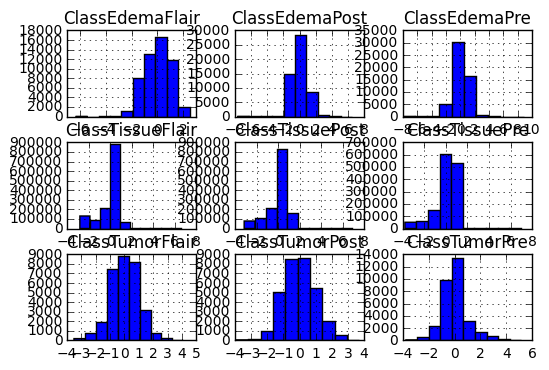

In [17]:
# histograms
datapd.hist()
plt.show()


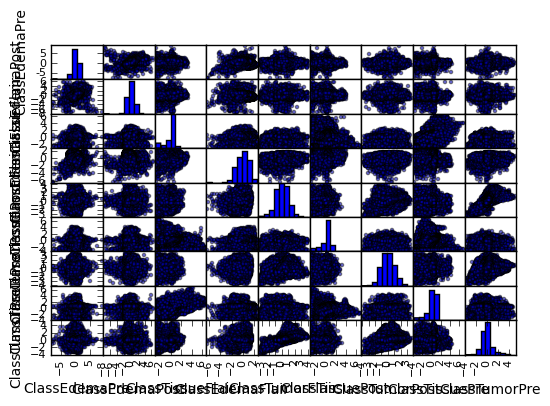

In [18]:
# scatter plot matrix
scatter_matrix(datapd)
plt.show()